## 1. 보팅(Voting)

In [1]:
import pandas as pd
df = pd.read_csv("wine_data.csv")
df

## 타겟 = class (0,1,2)

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [2]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']


In [3]:
# 트레이닝/테스트 데이터 분할

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [4]:
#데이터 표준화

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [5]:
# 보팅 학습을 위한 라이브러리

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [6]:
# 보팅 학습
clf1 = LogisticRegression(multi_class='multinomial',random_state=1) # 분류기 1
clf2 = svm.SVC(kernel='linear',random_state=1) # 분류기2 
clf3 = GaussianNB() # 분류기3

clf_voting = VotingClassifier(
                estimators=[
                    ('lr', clf1),
                    ('svm', clf2),
                    ('gnb', clf3)
                ],
                voting = 'hard', # hard : 과반수 넘는 라벨 설정, soft : 확률이 가장 높은 라벨로 설정
                weights=[1,1,1]) # 분류기별 가중치
clf_voting.fit(X_tn_std, y_tn)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('svm', SVC(kernel='linear', random_state=1)),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [7]:
# 예측

pred_voting = clf_voting.predict(X_te_std)
print(pred_voting)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [8]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_voting)
print(accuracy)

1.0


In [9]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_voting, average='macro')
print(precision)

1.0


In [10]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_voting, average='macro')
print(recall)

1.0


In [11]:
# f1 스코어

from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_voting, average='macro')
print(f1)

1.0


In [12]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_voting)
print(conf_matrix)


[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [13]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_voting)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 2. 랜덤포레스트(Random forest)

In [15]:
import pandas as pd
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [16]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']


In [17]:
# 트레이닝/테스트 데이터 분할

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)


In [18]:
#데이터 표준화

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [20]:
#랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, # max_deapth : decision tree의 depth
random_state=0)
clf_rf.fit(X_tn_std, y_tn)

RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
# 예측

pred_rf = clf_rf.predict(X_te_std)
print(pred_rf)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [22]:
# 정확도(accuracy)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9555555555555556


In [23]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_rf, average='macro')
print(precision)

0.943355119825708


In [24]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_rf, average='macro')
print(recall)

0.9682539682539683


In [25]:
# f1 스코어

from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_rf, average='macro')
print(f1)

0.9536244800950685


In [26]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_rf)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [27]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



## 3. 배깅

In [30]:
import pandas as pd
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [31]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']


In [32]:
# 트레이닝/테스트 데이터 분할

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)


In [33]:
#데이터 표준화

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [35]:
# 배깅 학습

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator = GaussianNB(),
                               n_estimators=10,
                               random_state=0)
clf_bagging.fit(X_tn_std, y_tn)

BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [36]:
# 예측

pred_bagging = clf_bagging.predict(X_te_std)
print(pred_bagging)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [37]:
# 정확도(accuracy)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_bagging)
print(accuracy)

0.9555555555555556


In [38]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_bagging, average='macro')
print(precision)


0.943355119825708


In [39]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_bagging, average='macro')
print(recall)


0.9682539682539683


In [40]:
# f1 score

from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_bagging, average='macro')
print(f1)


0.9536244800950685


In [41]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_bagging)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [42]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_bagging)
print(class_report)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



## 4-1 부스팅 - 에이다 부스트

In [43]:
# 에이다 부스트 학습

from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=0)
clf_ada.fit(X_tn_std, y_tn)


AdaBoostClassifier(random_state=0)

In [44]:
# 예측

pred_ada = clf_ada.predict(X_te_std)
print(pred_ada)

[0 2 0 0 1 0 0 2 1 1 2 2 0 0 2 1 0 0 1 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 0 2 1 0 1 1 1]


In [45]:
# 정확도(accuracy)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_ada)
print(accuracy)


0.8666666666666667


In [46]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_ada, average='macro')
print(precision)

0.8970588235294118


In [47]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_ada, average='macro')
print(recall)


0.8998015873015873


In [48]:
# f1 스코어

from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_ada, average='macro')
print(f1)


0.8918128654970761


In [49]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_ada)
print(conf_matrix)

[[15  1  0]
 [ 5 16  0]
 [ 0  0  8]]


In [50]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_ada)
print(class_report)


              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.76      0.84        21
           2       1.00      1.00      1.00         8

    accuracy                           0.87        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.88      0.87      0.87        45



## 4-2 그래디언트 부스팅

In [51]:
# 그래디언트 부스팅 학습

from sklearn.ensemble import GradientBoostingClassifier
clf_gbt = GradientBoostingClassifier(max_depth=2,
                                    learning_rate=0.1, # 학습률
                                    random_state=0)
clf_gbt.fit(X_tn_std, y_tn)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [52]:
# 예측

pred_gboost = clf_gbt.predict(X_te_std)
print(pred_gboost)

[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [53]:
# 정확도(accuracy)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_gboost)
print(accuracy)


0.9555555555555556


In [54]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_gboost, average='macro')
print(precision)

0.943355119825708


In [55]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_gboost, average='macro')
print(recall)


0.9682539682539683


In [56]:
# f1 스코어

from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_gboost, average='macro')
print(f1)

0.9536244800950685


In [57]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_gboost)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [58]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_gboost)
print(class_report)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



## 5. 스태킹

In [59]:
# 스태킹 학습을 위한 라이브러리

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [60]:
# 스태킹 학습

clf1 = svm.SVC(kernel='linear', random_state=1) 
clf2 = GaussianNB()
clf_stkg = StackingClassifier(
            estimators=[
            ('svm', clf1), 
            ('gnb', clf2)
            ],
            final_estimator=LogisticRegression())
clf_stkg.fit(X_tn_std, y_tn)


StackingClassifier(estimators=[('svm', SVC(kernel='linear', random_state=1)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [61]:
# 예측

pred_stkg = clf_stkg.predict(X_te_std)
print(pred_stkg)


[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [62]:
# 정확도(accuracy)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_stkg)
print(accuracy)


0.9555555555555556


In [63]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_stkg, average='macro')
print(precision)


0.943355119825708


In [66]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_stkg, average='macro')
print(recall)


0.9682539682539683


In [67]:
# f1 스코어

from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_stkg, average='macro')
print(f1)


0.9536244800950685


In [68]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_stkg)
print(conf_matrix)


[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [70]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_stkg)
print(class_report)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



## 6. K평균 클러스터링

In [46]:
# 데이터 생성

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
n_features=2, # 차원
centers=5, #각 클러스터의 중심점
random_state=10)

In [47]:
# 생성된 데이터 차원 확인

print(X.shape) 
print(y.shape)

(100, 2)
(100,)


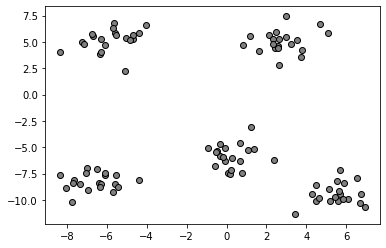

In [48]:
# 라벨링 되지 않은 데이터 플랏

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
c='gray', 
edgecolor='black', 
marker='o')
plt.show()

In [49]:
# k-means clustering

from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, 
    init='random', 
    max_iter=100, 
    random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_ 
print(label_kmc)

[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]


In [50]:
# 시각화를 위한 데이터프레임 생성

import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)


,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [51]:
# 타겟 클래스 종류 확인

print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


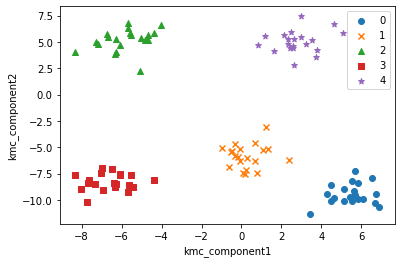

In [54]:
# k-means clustering 데이터 플랏

df = X_kmc_df
markers=['o','x','^','s','*']
for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)
plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

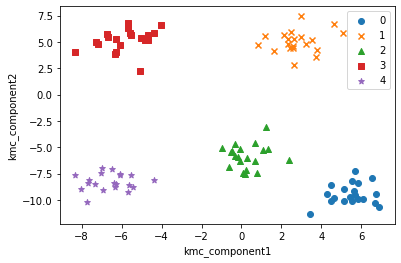

In [56]:
# 실제 타겟 플랏

df = X_kmc_df
markers=['o','x','^','s','*']
for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
            marker=mark, 
            label=target_i)
plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [57]:
# 모형 평가

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)


0.7598181300128782


In [ ]:
## 주성분 분석

In [62]:
import pandas as pd
df = pd.read_csv("wine_data.csv")
df


,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [63]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']


In [64]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [65]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [66]:
# 차원축소 확인
print(X_tn_std.shape)
print(X_tn_pca.shape)

(133, 13)
(133, 2)


In [67]:
# 고유값 확인
print(pca.singular_values_)

[25.3887705  18.00040359]


In [68]:
# 고유벡터 확인
print(pca.components_)

[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]
 [-0.50194071 -0.23015832 -0.31022311  0.03872248 -0.23858952 -0.09688729
  -0.01451474 -0.03693926 -0.0584635  -0.54240798  0.28168064  0.16944035
  -0.35182263]]


In [69]:
# 설명된 분산
print(pca.explained_variance_)

[4.88325506 2.45465553]


In [70]:
# 설명된 분산 비율
print(pca.explained_variance_ratio_)

[0.37281068 0.18739996]


In [71]:
# 데이터프레임 생성
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns=pca_columns)
y_tn1 = y_tn.reset_index(drop=True)
X_tn_pca_df['target'] = y_tn1
X_tn_pca_df.head(10)


,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0
5,-2.287471,-0.199359,2
6,-2.972450,-0.296523,2
7,2.618098,-0.776070,0
8,-1.047055,-3.490933,2
9,2.609816,0.073457,0


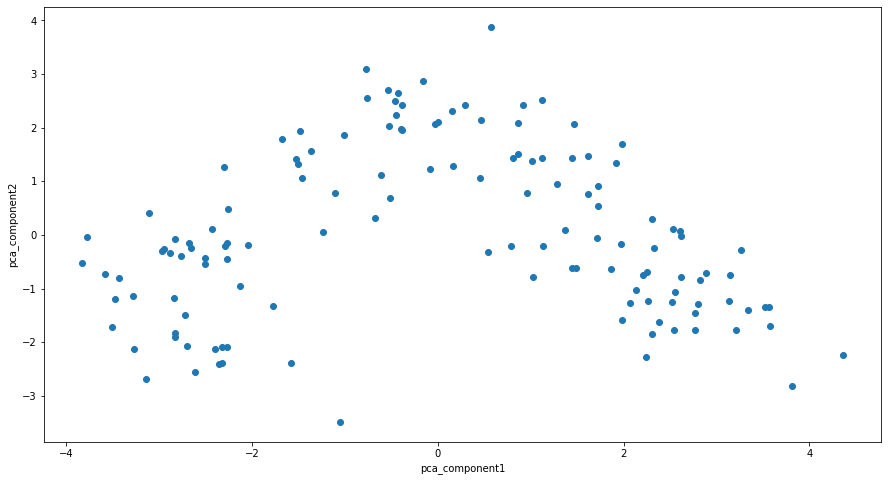

In [72]:
# 라벨 미적용 PCA 데이터
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_tn_pca_df['pca_comp1'],
X_tn_pca_df['pca_comp2'], 
marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()


In [73]:
# 라벨 적용 PCA 플랏
df = X_tn_pca_df
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]
X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']
X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']


In [74]:
target_0 = 0
target_1 = 1
target_2 = 2
X_23 = df_2['pca_comp2']

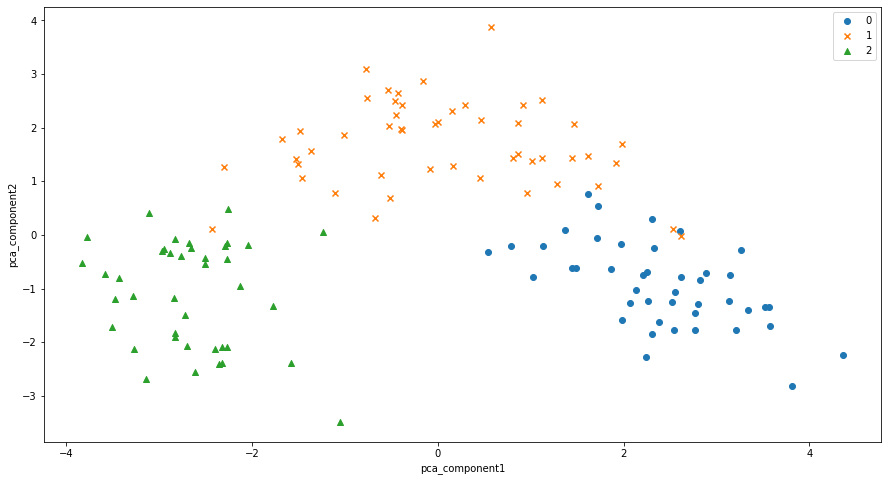

In [75]:
plt.figure(figsize=(15,8))
plt.scatter(X_11, X_21, 
marker='o', 
label=target_0)
plt.scatter(X_12, X_22, 
marker='x', 
label=target_1)
plt.scatter(X_13, X_23, 
marker='^', 
label=target_2)
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()


In [ ]:
# 실습 : 위 데이터로 지도 학습 해보기 with k 최근접 이웃 알고리즘

In [76]:
X_tn_pca_df

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0
...,...,...,...
128,-0.540398,2.693526,1
129,0.294211,2.430463,1
130,-0.033184,2.066114,1
131,2.886899,-0.714086,0


In [77]:
#피처와 타겟으로 나누기
features =['pca_comp1', 'pca_comp2']
X = df[features]
## 행렬
y = df['target']
## 백터
X
y

0      0
1      2
2      1
3      2
4      0
      ..
128    1
129    1
130    1
131    0
132    2
Name: target, Length: 133, dtype: int64

1) 트레이닝/테스트 데이터 분할(이미 타겟과 피처 정해져있기때문에 안해도 됨)
from sklearn.model_selection import train_test_split
X_tn,X_te,y_tn,y_te=train_test_split(X,y,random_state=0)

2) 데이터 표준화(여기서는 이미 주성분에서 했기때문에 안해도 됨)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)

X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_tn_std,y_tn)

KNeighborsClassifier(n_neighbors=2)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_tn_std,y_tn)
#여기서 'X_tn_std' 대신 'X_tn_pca'넣어서 바로 구해도 됨!

KNeighborsClassifier(n_neighbors=2)

In [ ]:
X_tn_pca_df

In [82]:
#k 최근접 방법에 따른 예측
knn_pred = clf_knn.predict(X_te_std)
print(knn_pred)

[1 1 1 2 0 0 1 2 1 2 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 2 1 1 0 1 2 1 0]


In [83]:
#정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te,knn_pred)
print(accuracy)

0.9705882352941176


In [84]:
#정밀도
from sklearn.metrics import precision_score
precision = precision_score(y_te,knn_pred,average = 'macro')
print(precision)

0.9666666666666667


In [85]:
#리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te,knn_pred, average='macro')
print(recall)

0.9833333333333334


In [86]:
#F1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te,knn_pred, average='macro')
print(f1)

0.9739091318038686


In [87]:
# confusion matrix 확인
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_te,knn_pred)
print(conf_matrix)

[[ 9  0  0]
 [ 1 19  0]
 [ 0  0  5]]


In [88]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te,knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         5

    accuracy                           0.97        34
   macro avg       0.97      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



In [ ]:
# 위 데이터로 지도 학습 해보기 with 선형회귀분석

In [95]:
#학습
from sklearn.linear_model import LinearRegression
clf_Ir = LinearRegression()
clf_Ir.fit(X_tn_std, y_tn)

LinearRegression()

In [ ]:
# 선형회귀분석 모형 추정 계수 확인 (w 값과 b값 구하기)

In [96]:
print(clf_Ir.coef_)

[-0.77158851 -0.04987048]


In [97]:
print(clf_Ir.intercept_)

1.0101010101010102


In [103]:
# 릿지 회귀분석(L2 제약식 적용)
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha=1)
clf_ridge.fit(X_tn_std,y_tn)

Ridge(alpha=1)

In [104]:
# 리쏘 회귀분석(L1 제약식 적용)
from sklearn.linear_model import Lasso
clf_lasso= Lasso(alpha=0.01)
clf_lasso.fit(X_tn_std,y_tn)

Lasso(alpha=0.01)

In [ ]:
# 엘라스틱넷

In [101]:
from sklearn.linear_model import ElasticNet
clf_elastic = ElasticNet(alpha=0.01, l1_ratio=0.01)
clf_elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [107]:
# 예측(평가방법)
pred_lr = clf_Ir.predict(X_te_std)
pred_ridge = clf_ridge.predict(X_te_std)
pred_lasso = clf_lasso.predict(X_te_std)
pred_elastic = clf_elastic.predict(X_te_std)

In [106]:
# 모형 평가-R제곱값
from sklearn.metrics import r2_score
print(r2_score(y_te, pred_lr))
print(r2_score(y_te, pred_ridge))
print(r2_score(y_te, pred_lasso))
print(r2_score(y_te, pred_elastic))

0.6098340388318059
0.6125872665093051
0.6205238272743844
0.612643730097975


In [108]:
# 모형 평가-MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_elastic))

0.1552563513299042
0.15416077630252564
0.15100262928527955
0.15413830809250129


In [ ]:
#DBSCAN 

In [109]:
# 데이터 생성
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, 
noise=0.05 ,
random_state=0)

In [110]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(300, 2)
(300,)


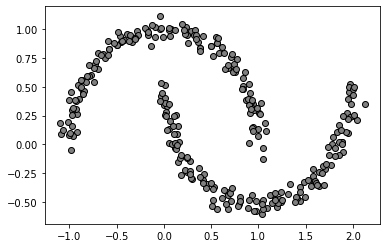

In [111]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
c='gray', 
edgecolor='black', 
marker='o')
plt.show()


In [112]:
# DB scan
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [113]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(5)


,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [114]:
# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))


{0, 1}
{0, 1}


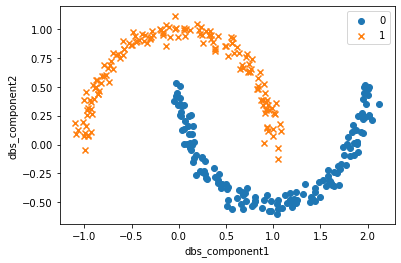

In [117]:
# DB scan 을 이용한 데이터 플랏
df = X_dbs_df
markers=['o','x']
for i, mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)
plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()


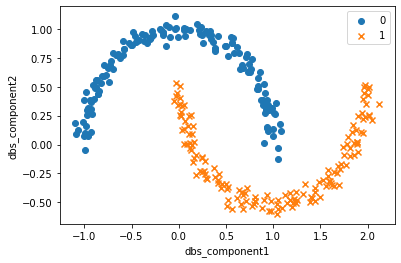

In [118]:
# 실제 타겟 플랏
df = X_dbs_df
markers=['o','x']
for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)
plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()


In [119]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print(sil_score)


0.3284782012631504
